In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [42]:
df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Mariah Carey\Data\merged_data.csv")

In [43]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.sort_values(by = 'Date')

,Date,AIWFC,Christmas,MariahCarey,Memes
0,2018-11-11,15,25,38,80
1,2018-11-18,19,35,52,81
2,2018-11-25,22,49,35,85
3,2018-12-02,38,53,36,81
4,2018-12-09,42,52,38,89
...,...,...,...,...,...
256,2023-10-08,7,7,17,32
257,2023-10-15,6,8,18,30
258,2023-10-22,7,10,19,32
259,2023-10-29,40,18,58,30


In [44]:
# Preparing the dataframe up for regression. Must convert date to days (numeric)
start_date = df['Date'].min()  
df['Days'] = (df['Date'] - start_date).dt.days

Text(0, 0.5, 'Mariah Carey Popularity')

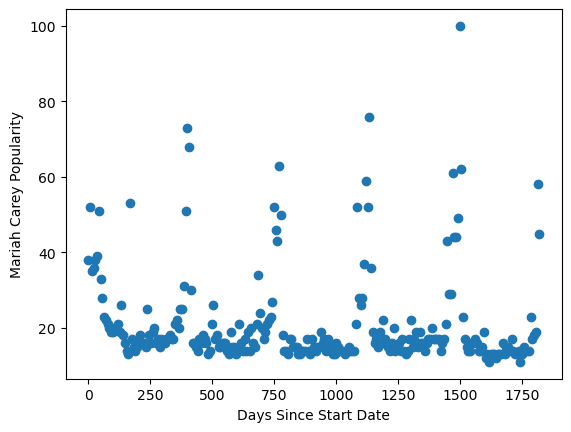

In [60]:
plt.scatter(df['Days'], df['MariahCarey'])
plt.xlabel('Days Since Start Date')
plt.ylabel('Mariah Carey Popularity')

#### Adding in sinusoidal featuresm=

In [45]:
df['Days_Sin'] = np.sin(2*np.pi * df['Days']/365)  # 52 Weeks in a year. This is the assumed sinusoidal period
df['Days_Cos'] = np.cos(2*np.pi * df['Days']/365)

df['Days_SinCos'] = df['Days_Sin'] * df['Days_Cos']
df['Days_Sin2'] = df['Days_Sin']**2
df['Days_Cos2'] = df['Days_Cos']**2

df.head()

,Date,AIWFC,Christmas,MariahCarey,Memes,Days,Days_Sin,Days_Cos,Days_SinCos,Days_Sin2,Days_Cos2
0,2018-11-11,15,25,38,80,0,0.000000,1.000000,0.000000,0.000000,1.000000
1,2018-11-18,19,35,52,81,7,0.120208,0.992749,0.119336,0.014450,0.985550
2,2018-11-25,22,49,35,85,14,0.238673,0.971100,0.231775,0.056965,0.943035
3,2018-12-02,38,53,36,81,21,0.353676,0.935368,0.330817,0.125087,0.874913
4,2018-12-09,42,52,38,89,28,0.463550,0.886071,0.410738,0.214879,0.785121


In [46]:
X = df[['Days_Sin', 'Days_Cos', 'Days_SinCos', 'Days_Sin2', 'Days_Cos2']].values
y = df['MariahCarey']

In [47]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

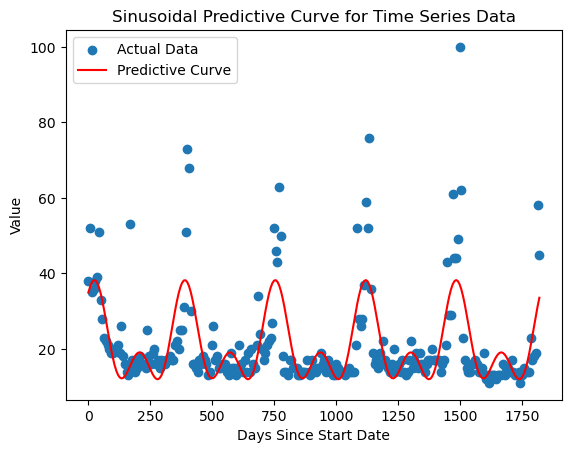

In [48]:
plt.scatter(df['Days'], y, label='Actual Data')
plt.plot(df['Days'], model.predict(X), color='red', label='Predictive Curve')
plt.xlabel('Days Since Start Date')
plt.ylabel('Value')
plt.legend()
plt.title('Sinusoidal Predictive Curve for Time Series Data')
plt.show()

This is the sinusoidal fit. But as we can see, the peaks are different each year. We are going to try combining this sinusoidal feature along with polynomial features. The resulting fitted curve will be something like f(x)*sin(x) where f(x) is some polynomial function.

#### Finding Polynomial Equation

In [49]:
df['iter1'] = df['MariahCarey'] / y_pred

In [50]:
df.head()

,Date,AIWFC,Christmas,MariahCarey,Memes,Days,Days_Sin,Days_Cos,Days_SinCos,Days_Sin2,Days_Cos2,iter1
0,2018-11-11,15,25,38,80,0,0.000000,1.000000,0.000000,0.000000,1.000000,1.086987
1,2018-11-18,19,35,52,81,7,0.120208,0.992749,0.119336,0.014450,0.985550,1.422832
2,2018-11-25,22,49,35,85,14,0.238673,0.971100,0.231775,0.056965,0.943035,0.929882
3,2018-12-02,38,53,36,81,21,0.353676,0.935368,0.330817,0.125087,0.874913,0.942778
4,2018-12-09,42,52,38,89,28,0.463550,0.886071,0.410738,0.214879,0.785121,0.995831


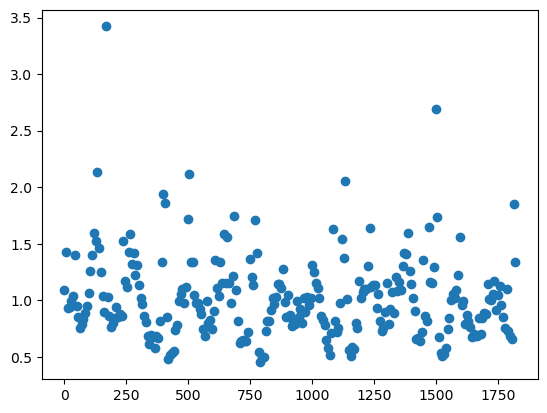

In [51]:
plt.scatter(df['Days'], df['iter1'])    

In [63]:
degree = 5

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(df['Days'].values.reshape(-1, 1))

# Fit linear regression model on the polynomial features
model2 = LinearRegression()
model2.fit(X_poly, df['iter1'])

y_pred2 = model2.predict(X_poly)

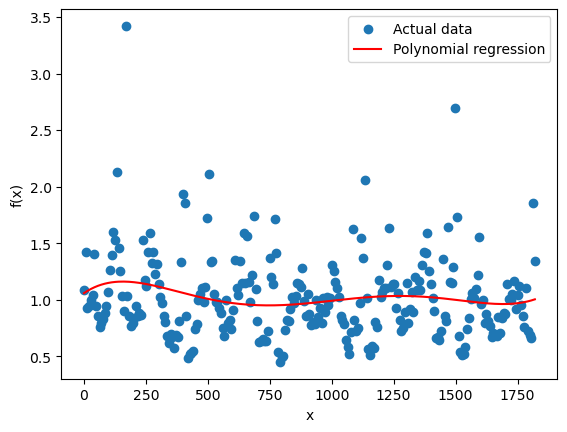

In [64]:
# Visualization
sorted_idx = np.argsort(df['Days'].values.flatten())
plt.scatter(df['Days'].values, df['iter1'], label='Actual data')
plt.plot(df['Days'].values[sorted_idx], y_pred2[sorted_idx], color='red', label='Polynomial regression')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [65]:
df['final_pred'] = y_pred * y_pred2

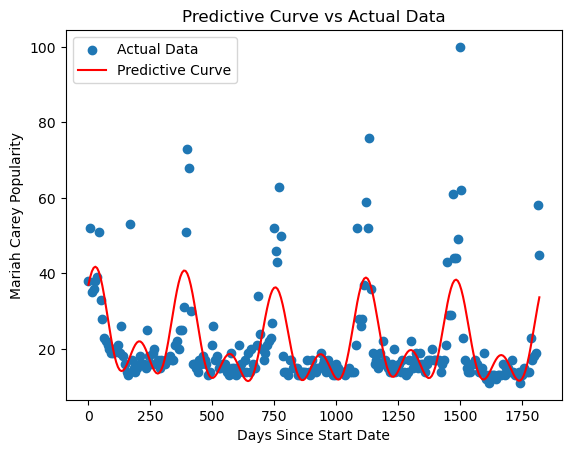

In [66]:
plt.scatter(df['Days'], df['MariahCarey'], label='Actual Data')
plt.plot(df['Days'], df['final_pred'], color='red', label='Predictive Curve')
plt.xlabel('Days Since Start Date')
plt.ylabel('Mariah Carey Popularity')
plt.legend()
plt.title('Predictive Curve vs Actual Data')
plt.show()